#**Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**

Vamos a comparar varios algoritmos de ML para crear modelos de regresión de inhibidores de la acetilcolinesterasa.

#**Importamos las librerías**

La librería LazyPredict permite comparar modelos de ML sin necesidad de escribir el código de cada modelo.

In [ ]:
! pip install lazypredict

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


#**Cargamos el conjunto de datos (3 clases)**

In [ ]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [ ]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

#**Preprocesado de los datos**

In [ ]:
X.shape

(4695, 881)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(4695, 137)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#**Comparación de modelos ML**

In [ ]:
clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)


 98%|█████████▊| 41/42 [00:58<00:00,  1.08it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.814494


100%|██████████| 42/42 [00:59<00:00,  1.41s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 98%|█████████▊| 41/42 [00:54<00:00,  1.51it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.814494


100%|██████████| 42/42 [00:54<00:00,  1.30s/it]


In [ ]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.86,0.86,0.57,0.17
ExtraTreeRegressor,0.86,0.86,0.57,0.23
ExtraTreesRegressor,0.86,0.86,0.57,8.28
GaussianProcessRegressor,0.86,0.86,0.57,6.82
RandomForestRegressor,0.82,0.83,0.64,6.52
BaggingRegressor,0.80,0.81,0.67,0.60
MLPRegressor,0.76,0.77,0.75,8.85
HistGradientBoostingRegressor,0.67,0.69,0.87,1.22
LGBMRegressor,0.65,0.67,0.90,0.37


In [ ]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.46,0.54,1.06,1.15
RandomForestRegressor,0.44,0.52,1.08,6.44
LGBMRegressor,0.44,0.52,1.08,0.36
BaggingRegressor,0.41,0.49,1.11,0.56
NuSVR,0.39,0.48,1.12,1.53
SVR,0.39,0.48,1.12,1.98
KNeighborsRegressor,0.37,0.46,1.14,0.12
MLPRegressor,0.36,0.45,1.15,8.31
GradientBoostingRegressor,0.33,0.42,1.18,1.91


[(0.0, 1.0)]

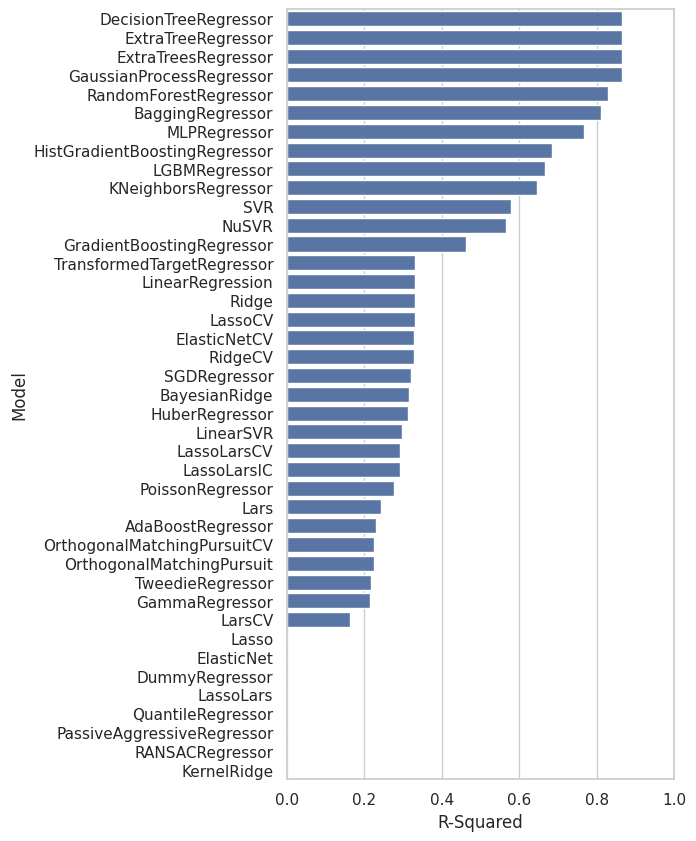

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

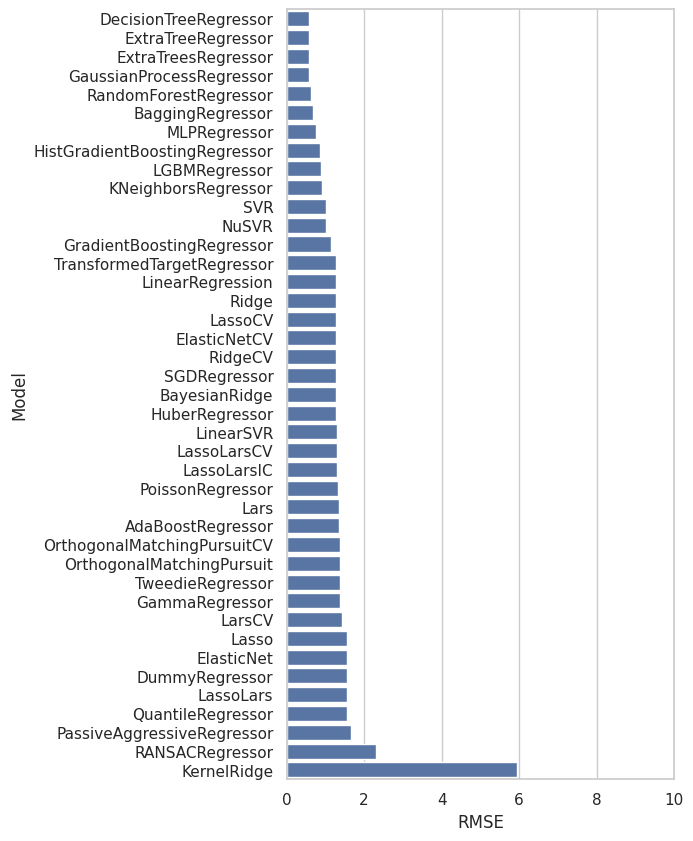

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

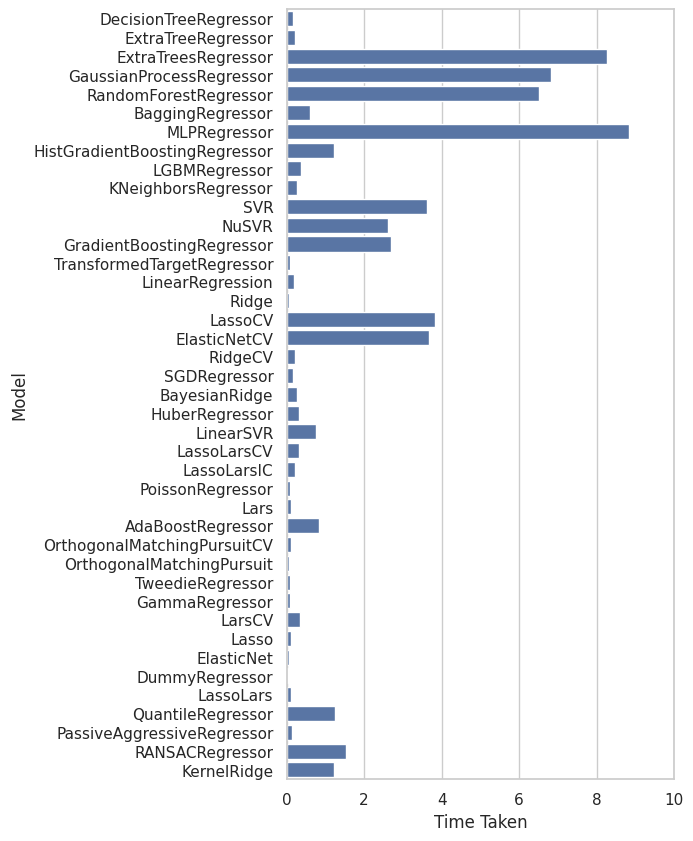

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))